# V827 spot-checking

Here we just spot check the config files to make sure the code has a good starting point.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd

In [36]:
df = pd.read_csv('../sf/V827Tau/m104/output/mix_emcee/run01/spec_config.csv')
CC = np.load('../sf/V827Tau/m104/output/mix_emcee/run01/CC.npy')

In [37]:
df.head(2)

,data,wl,model_composite,model_cool50,model_hot50
0,1.003062,17133.231859,1.048221,0.510735,0.537486
1,1.023801,17133.356818,1.051101,0.512878,0.538223


In [38]:
noised = np.random.multivariate_normal(df.model_composite, CC)

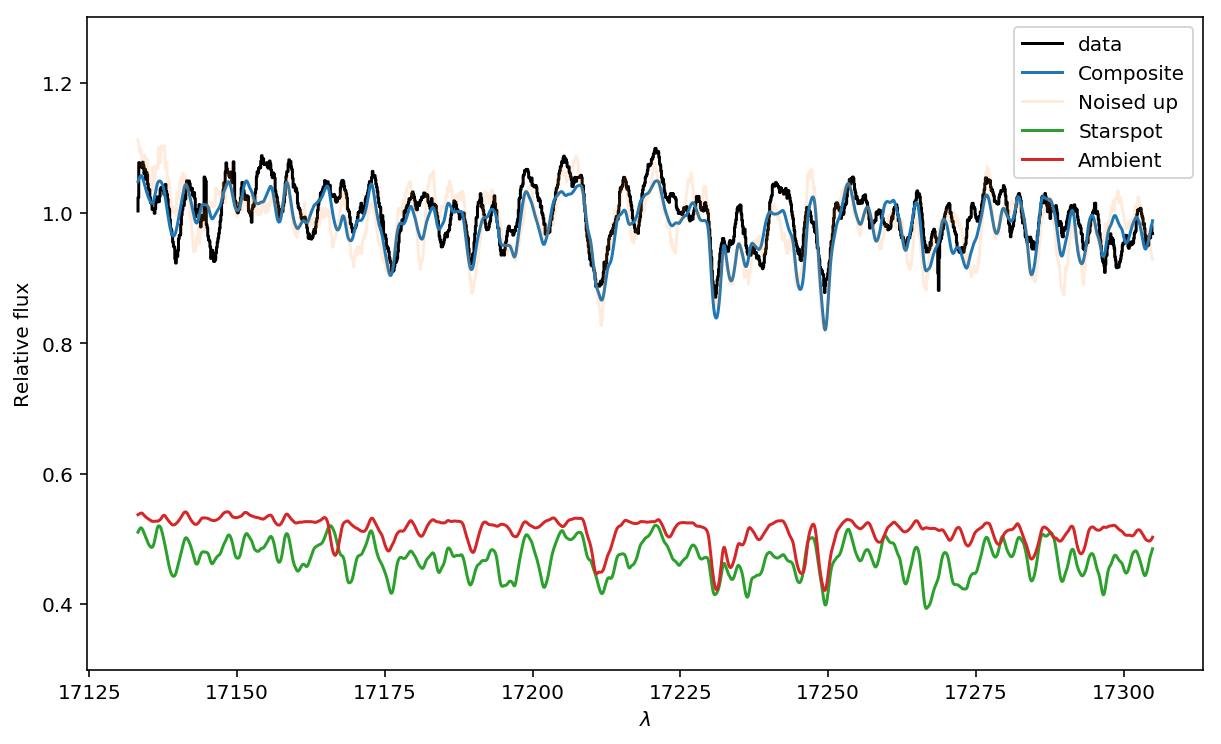

In [39]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, 'k-',label='data')
scale = 1.0 #df.data.median()/df.model_composite.median()
plt.plot(df.wl, df.model_composite*scale, label='Composite')
plt.plot(df.wl, noised, label='Noised up', alpha=0.15)
plt.plot(df.wl, df.model_cool50, label='Starspot')
plt.plot(df.wl, df.model_hot50, label='Ambient')
plt.legend(loc='best')
plt.xlabel('$\lambda$')
plt.ylabel('Relative flux')
plt.ylim(0.3, 1.3)
#plt.title('Initial Guess for V827Tau order m123, 72% fill factor');
plt.savefig('initial_guess_demo.png', bbox_inches='tight', dpi=300)

In [15]:
! open .

In [16]:
om, om2 = -5.55, -5.13
10**om2/(10**om+10**om2)

0.7245382428425361

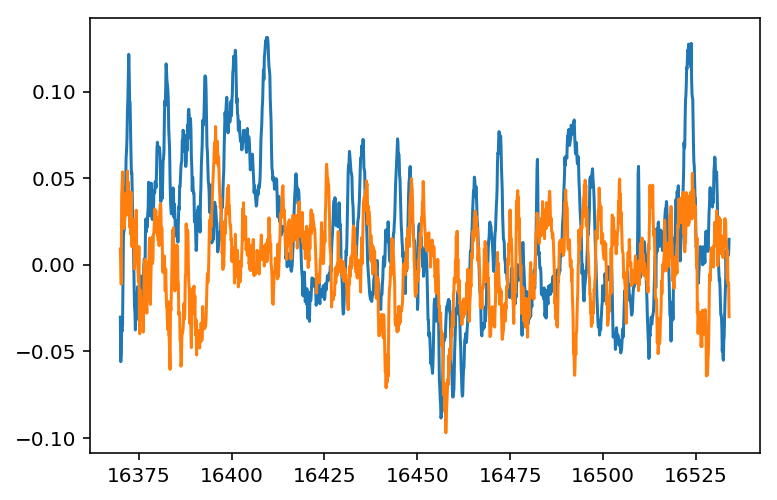

In [17]:
R_GP = df.model_composite-noised
R_dat = df.model_composite-df.data

plt.plot(df.wl, R_dat)
plt.plot(df.wl, R_GP)

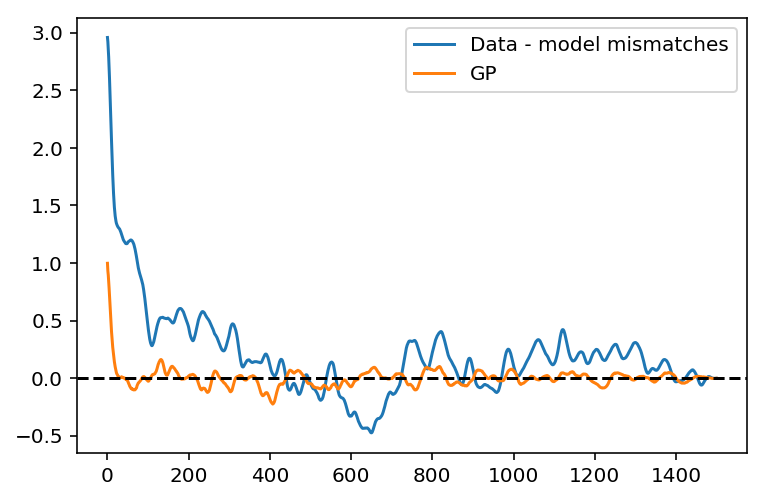

In [18]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size//2:]

plt.plot(autocorr(R_dat.values), label='Data - model mismatches')
plt.plot(autocorr(R_GP.values), label = 'GP')
plt.axhline(0, color='k', linestyle='dashed')
plt.legend(loc='best')

## Part II: MCMC spot checking

What about the MCMC chains?

In [16]:
ws = np.load("../sf/V827Tau/m103/output/mix_emcee/run01/emcee_chain.npy")

In [17]:
max_obs = ws.any(axis=(0,2)).sum()

In [19]:
ws.shape

(40, 5000, 14)

In [20]:
max_obs

5000

In [21]:
burned = ws[:, 0:max_obs,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [22]:
from matplotlib.ticker import MaxNLocator

In [23]:
label = [r"$T_{\mathrm{eff}}$", r"$\log{g}$", '[Fe/H]',r"$v_z$", r"$v\sin{i}$", r"$\log{\Omega}$", 
         r"$T_{\mathrm{eff}, 2}$", r"$\log{\Omega_2}$",
         r"$c^1$", r"$c^2$", r"$c^3$", r"sigAmp", r"logAmp", r"$l$"] 

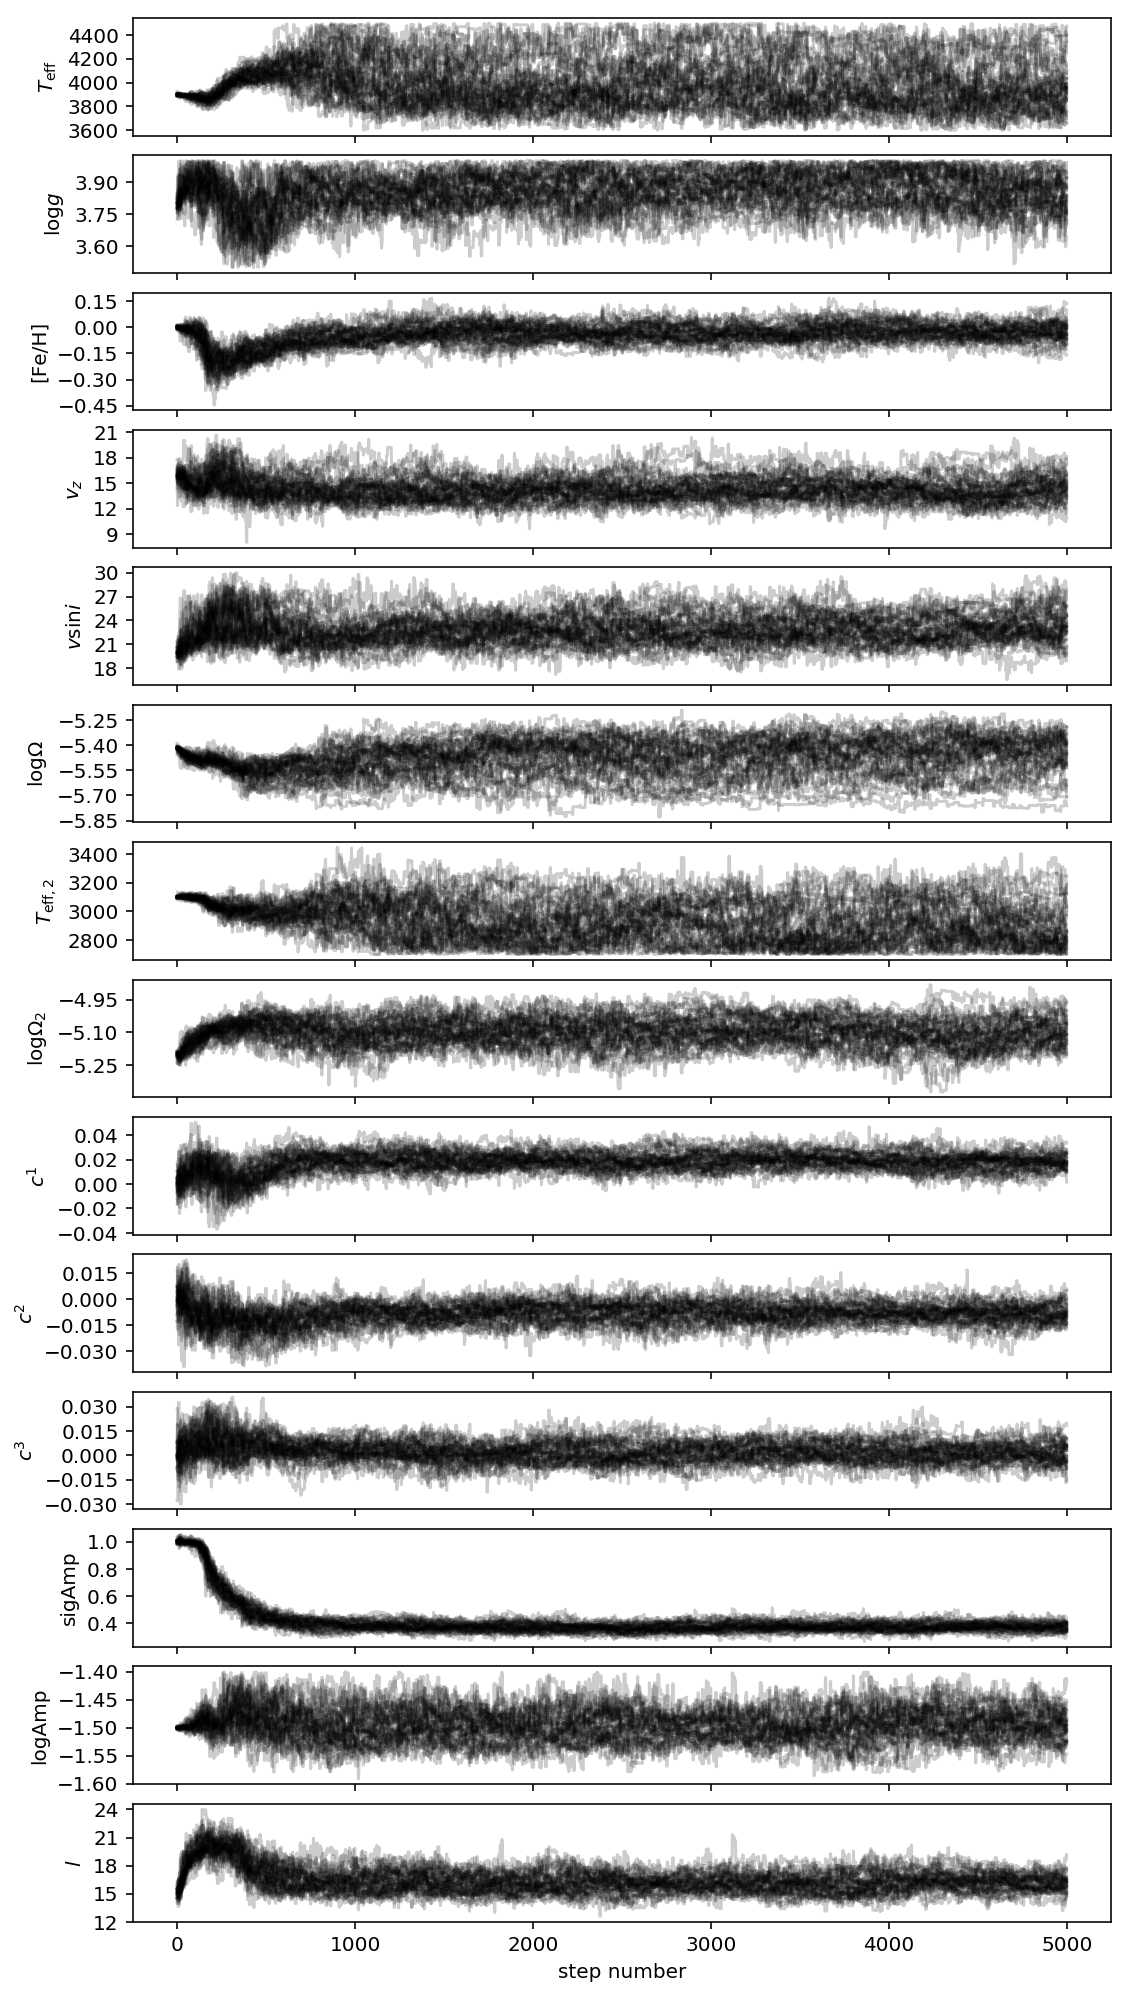

In [24]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(burned[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

What do those final 200 samples look like in spectra?

In [25]:
df = pd.read_csv('../sf/V827Tau/m102/output/mix_emcee/run01/models_ff-05_50_95.csv')

In [27]:
df.head()

,data,wl,model_comp05,model_cool05,model_hot05,model_comp50,model_cool50,model_hot50,model_comp95,model_cool95,model_hot95
0,1.026579,17459.808040,1.064715,0.362769,0.701946,1.050786,0.420038,0.630748,1.053513,0.459125,0.594388
1,1.035876,17459.935327,1.070045,0.367179,0.702865,1.056695,0.424983,0.631712,1.060098,0.464739,0.595359
2,1.032248,17460.062598,1.074799,0.371328,0.703470,1.061988,0.429627,0.632361,1.065854,0.469956,0.595898
3,1.021162,17460.189851,1.078937,0.375181,0.703756,1.066601,0.433944,0.632656,1.070447,0.474495,0.595952
4,1.016468,17460.317087,1.082307,0.378512,0.703795,1.070352,0.437693,0.632660,1.073102,0.477467,0.595635


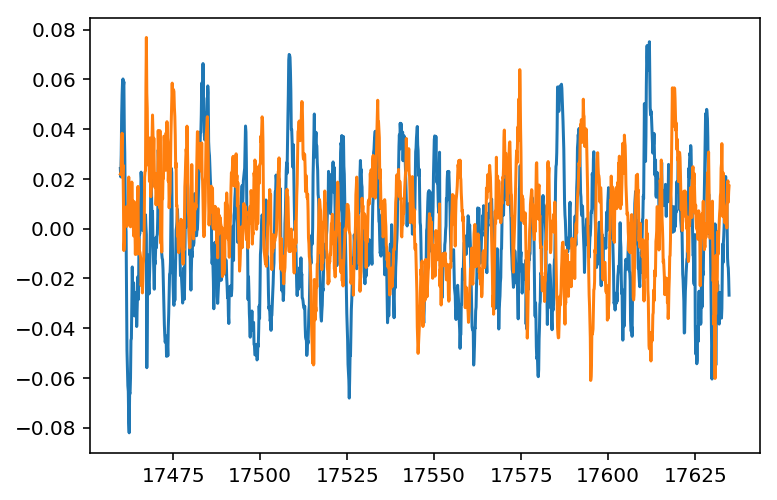

In [28]:
CC = np.load('../sf/V827Tau/m102/output/mix_emcee/run01/CC.npy')

noised = np.random.multivariate_normal(df.model_comp50, CC)

R_GP = df.model_comp50-noised
R_dat = df.model_comp50-df.data

plt.plot(df.wl, R_dat)
plt.plot(df.wl, R_GP)

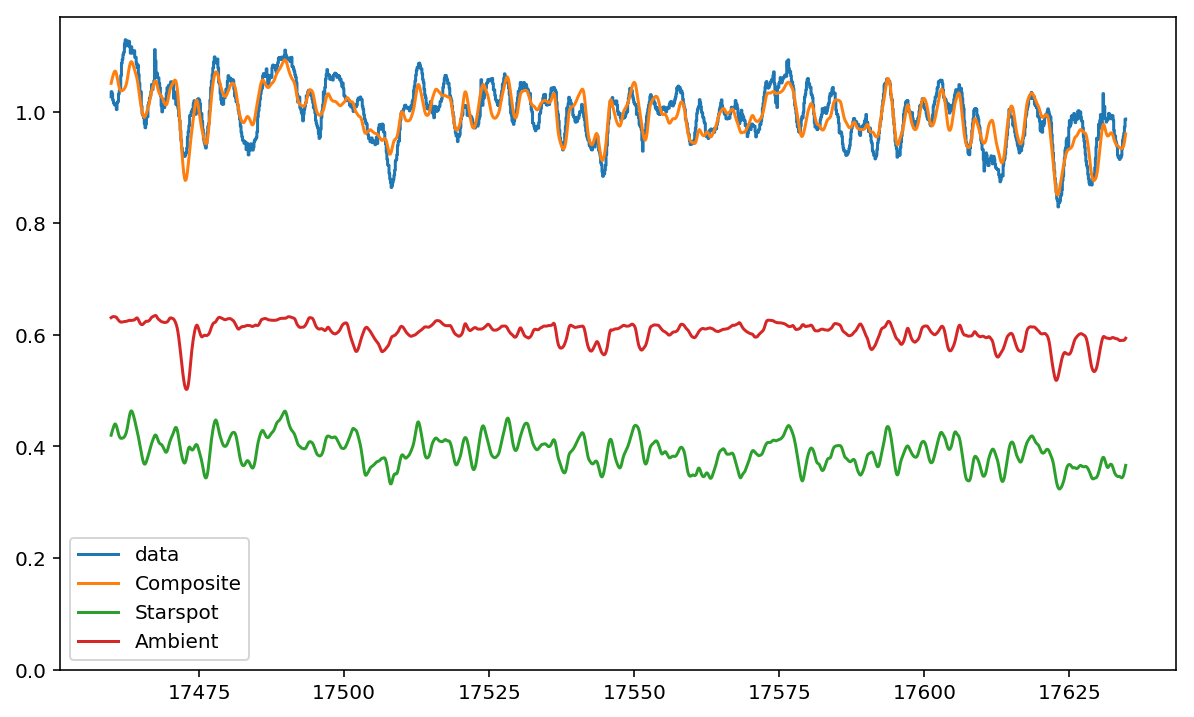

In [31]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, label='data')
plt.plot(df.wl, df.model_comp50, label='Composite')
#plt.plot(df.wl, df.model_comp05, label='Composite $-2\sigma$')
#plt.plot(df.wl, df.model_comp95, label='Composite $+2\sigma$')
#plt.plot(df.wl, noised, label='Noised up')
plt.plot(df.wl, df.model_cool50, label='Starspot')
plt.plot(df.wl, df.model_hot50, label='Ambient')
plt.ylim(0)
plt.legend(loc='best')

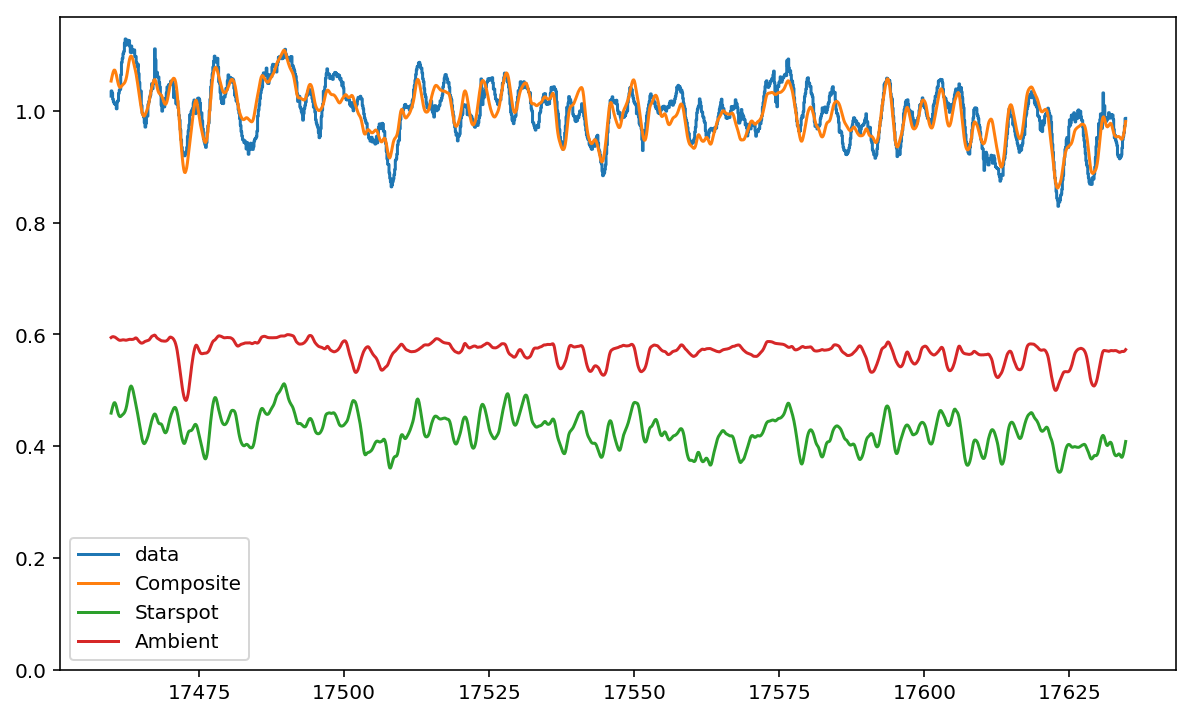

In [35]:
plt.figure(figsize=(10,6))
plt.step(df.wl, df.data, label='data')
plt.plot(df.wl, df.model_comp95, label='Composite')
#plt.plot(df.wl, df.model_comp05, label='Composite $-2\sigma$')
#plt.plot(df.wl, df.model_comp95, label='Composite $+2\sigma$')
#plt.plot(df.wl, noised, label='Noised up')
plt.plot(df.wl, df.model_cool95, label='Starspot')
plt.plot(df.wl, df.model_hot95, label='Ambient')
plt.ylim(0)
plt.legend(loc='best')

In [36]:
fc.shape

(200000, 14)

In [37]:
ff = fc[:, 5], fc[:, 7], '.', alpha=0.1)

SyntaxError: invalid syntax (<ipython-input-37-c77f214aa446>, line 1)

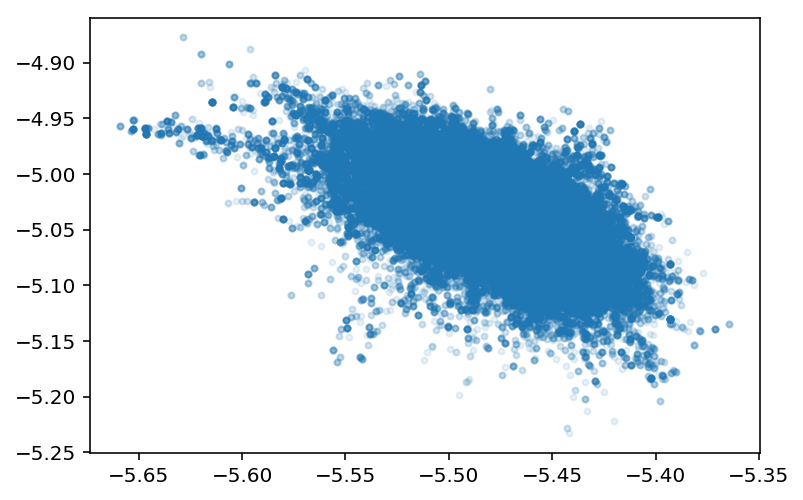

In [40]:
plt.plot(fc[:, 5], fc[:, 7], '.', alpha=0.1)

Not bad!